In [225]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error

In [226]:
import pymysql

user = 'root'
passw = 'password'
host =  'localhost'
port = 3306
database = 'retail_sales'

connection = pymysql.connect(host=host,port=port,user=user,passwd=passw,db=database,charset='utf8')
cursor = connection.cursor()

In [227]:
sql = "SELECT * FROM quarter_percentage2"
try:
   # Execute the SQL command
   cursor.execute(sql)
   # Fetch all the rows in a list of lists.
   results = cursor.fetchall()
   for row in results:
      year = row[0]
      quarter = row[1]
      sales = row[2]
      percentage=row[3]
      # Now print fetched result
      print ("year= %d,quarter = %d ,sales = %.2f,percentage=%.2f" % \
         (year,quarter,sales,percentage))
except:
   print ("Error: unable to fetch data")


year= 2014,quarter = 1 ,sales = 74447.80,percentage=0.00
year= 2014,quarter = 2 ,sales = 86538.80,percentage=0.00
year= 2014,quarter = 3 ,sales = 143633.00,percentage=0.00
year= 2014,quarter = 4 ,sales = 179628.00,percentage=0.00
year= 2015,quarter = 1 ,sales = 68851.70,percentage=-8.13
year= 2015,quarter = 2 ,sales = 89124.20,percentage=2.90
year= 2015,quarter = 3 ,sales = 130260.00,percentage=-10.27
year= 2015,quarter = 4 ,sales = 182297.00,percentage=1.46
year= 2016,quarter = 1 ,sales = 93237.20,percentage=20.15
year= 2016,quarter = 2 ,sales = 136082.00,percentage=36.41
year= 2016,quarter = 3 ,sales = 143787.00,percentage=0.11
year= 2016,quarter = 4 ,sales = 236099.00,percentage=23.92
year= 2017,quarter = 1 ,sales = 123145.00,percentage=39.54
year= 2017,quarter = 2 ,sales = 133764.00,percentage=35.31
year= 2017,quarter = 3 ,sales = 196252.00,percentage=26.81
year= 2017,quarter = 4 ,sales = 280054.00,percentage=35.86


In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [229]:
df = pd.read_sql_query("select * from quarter_percentage2;", connection)

In [230]:
df.head()

,year,quarter,sales,percentage
0,2014,1,74447.8,0.0000
1,2014,2,86538.8,0.0000
2,2014,3,143633.0,0.0000
3,2014,4,179628.0,0.0000
4,2015,1,68851.7,-8.1277


In [290]:
df.to_csv('dataset.csv')

In [231]:
df

,year,quarter,sales,percentage
0,2014,1,74447.8,0.00000
1,2014,2,86538.8,0.00000
2,2014,3,143633.0,0.00000
3,2014,4,179628.0,0.00000
4,2015,1,68851.7,-8.12770
5,2015,2,89124.2,2.90093
6,2015,3,130260.0,-10.26690
7,2015,4,182297.0,1.46425
8,2016,1,93237.2,20.15220
9,2016,2,136082.0,36.40700


In [232]:
df.describe()

,year,quarter,sales,percentage
count,16.000000,16.000000,16.000000,16.000000
mean,2015.500000,2.500000,143575.043750,12.754774
std,1.154701,1.154701,59229.757625,17.697012
min,2014.000000,1.000000,68851.700000,-10.266900
25%,2014.750000,1.750000,92208.950000,0.000000
50%,2015.500000,2.500000,134923.000000,2.182590
75%,2016.250000,3.250000,180295.250000,28.935125
max,2017.000000,4.000000,280054.000000,39.544500


In [233]:
df.columns

Index(['year', 'quarter', 'sales', 'percentage'], dtype='object')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
year          16 non-null int64
quarter       16 non-null int64
sales         16 non-null float64
percentage    16 non-null float64
dtypes: float64(2), int64(2)
memory usage: 592.0 bytes


/home/kavya/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


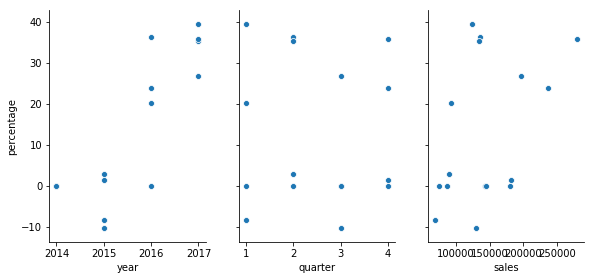

In [235]:
sns.pairplot(df, x_vars=['year','quarter','sales'], y_vars='percentage', size=4, aspect=0.7)

/home/kavya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


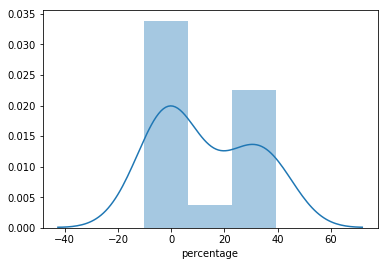

In [236]:
sns.distplot(df['percentage'])

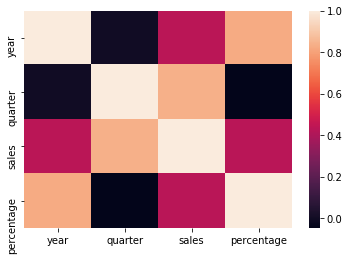

In [237]:
sns.heatmap(df.corr())

# Training a linear regression model

# x and y arrays

In [172]:
X = df[['year','quarter','sales']]
y = df['percentage']

In [173]:
len(X),len(y)

(16, 16)

In [174]:
X.shape

(16, 3)

In [175]:
y.shape

(16,)

# Test train split

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Creation and training the model

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm = LinearRegression()

In [180]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [181]:
print(lm.intercept_)

-5303.026214427516


In [182]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
year,2.629806
quarter,-18.372616
sales,0.000418


In [183]:
predictions = lm.predict(X_test)

In [184]:
X_test

,year,quarter,sales
0,2014,1,74447.8
1,2014,2,86538.8
5,2015,2,89124.2
14,2017,3,196252.0
13,2017,2,133764.0
11,2016,4,236099.0
8,2016,1,93237.2


In [221]:
y_test

0      0.00000
1      0.00000
5      2.90093
14    26.81180
13    35.30510
11    23.91840
8     20.15220
Name: percentage, dtype: float64

In [224]:
predictions

array([ 6.11824574, -7.20544753, -3.49603798, 28.12505967, 20.40412647,
       23.76182668, 19.22387853])

In [185]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( predictions, 2),
                            'residuals': y_test - predictions })

In [186]:
test_pred_df

,actual,predicted,residuals
0,0.00000,6.12,-6.118246
1,0.00000,-7.21,7.205448
5,2.90093,-3.50,6.396968
14,26.81180,28.13,-1.313260
13,35.30510,20.40,14.900974
11,23.91840,23.76,0.156573
8,20.15220,19.22,0.928321


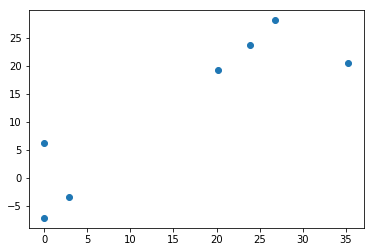

In [187]:
plt.scatter(y_test,predictions)

/home/kavya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


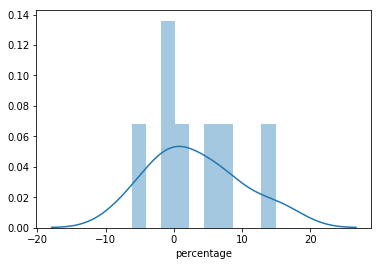

In [188]:
sns.distplot((y_test-predictions),bins=10);

In [189]:
from sklearn import metrics

In [190]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.288541320364482
MSE: 50.70322335528633
RMSE: 7.1206195906877605


In [191]:
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))

Linear Regression R squared": 0.7165


In [192]:
import pickle
# Save to file in the current working directory
pkl_filename = "linear_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(lm, file)

In [193]:
X_test

,year,quarter,sales
0,2014,1,74447.8
1,2014,2,86538.8
5,2015,2,89124.2
14,2017,3,196252.0
13,2017,2,133764.0
11,2016,4,236099.0
8,2016,1,93237.2


# Prediction

In [194]:
import pickle
import array as arr
import numpy as np

filename='linear_model.pkl'

year = input("Enter year: ")
quarter = input("Enter quarter: ")
sales = input("Enter sales: ")

input_arr = [[year,quarter,sales]]

#load the model from disk
model = pickle.load(open(filename, 'rb'))
res = model.predict(np.array(input_arr,dtype='float64'))
print("percentage change: ",res[0])

Enter year: 2018
Enter quarter: 2
Enter sales: 451551
percentage change:  155.734464531125


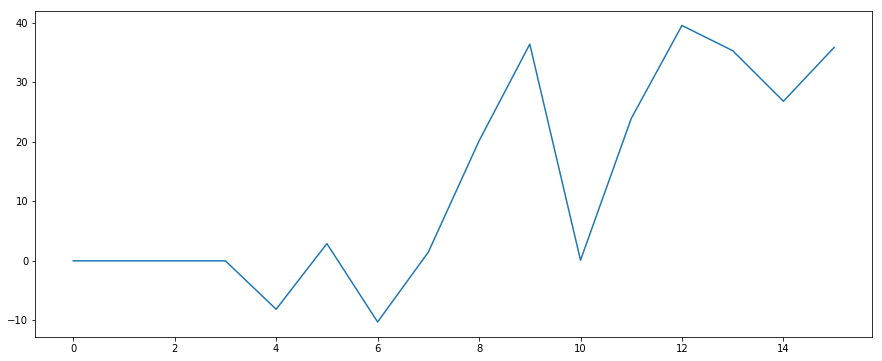

In [195]:
y.plot(figsize=(15, 6))
plt.show()

In [196]:
new_input = pd.read_sql_query("select * from quarter_percentage2;", connection)
new_input.head()

,year,quarter,sales,percentage
0,2014,1,74447.8,0.0000
1,2014,2,86538.8,0.0000
2,2014,3,143633.0,0.0000
3,2014,4,179628.0,0.0000
4,2015,1,68851.7,-8.1277


In [197]:
new_input = pd.read_sql_query("select * from quarter_percentage where year in (select max(year) from quarter_percentage);", connection)
quarter = new_input["quarter"].max()
year = new_input["year"].max()
print(new_input)
print(quarter)
print(year)
print(new_input["sales"])

   year  quarter     sales  percentage
0  2017        1  123145.0     39.5445
1  2017        2  133764.0     35.3051
2  2017        3  196252.0     26.8118
3  2017        4  280054.0     35.8596
4
2017
0    123145.0
1    133764.0
2    196252.0
3    280054.0
Name: sales, dtype: float64


In [198]:
new_input_sales = pd.read_sql_query("select min(sales) as mn,max(sales) as mx from quarter_percentage", connection)
new_input_sales

,mn,mx
0,68851.734375,280054.0625


In [199]:
import random
sales_rand = random.randrange(68851, 280054, 3)
print(sales_rand)

118723


In [200]:
from itertools import repeat
import random

lst = []

for i in repeat(None, 10):
    sales_rd = random.randrange(68851, 280054, 3)
    if(quarter == 4):
        year = year + 1
        quarter = 1
    else:
        quarter = quarter + 1
    #print(year,quarter,sales_rd)
    #row = [[year,quarter,sales_rd]]
    lst.append([year,quarter,sales_rd])

data = pd.DataFrame(lst)

In [201]:
data

,0,1,2
0,2018,1,194305
1,2018,2,148048
2,2018,3,73909
3,2018,4,125671
4,2019,1,177013
5,2019,2,182923
6,2019,3,259879
7,2019,4,260185
8,2020,1,85372
9,2020,2,165142


In [202]:
import pickle
import array as arr
import numpy as np

filename='linear_model.pkl'
model = pickle.load(open(filename, 'rb'))
res = model.predict(data)
print(res)

[ 66.68707615  28.99860194 -20.33275331 -17.09075067  62.09614127
  46.19140476  59.95384153  41.70900369  26.45877637  41.39627474]


In [203]:
res[0]

66.68707614973573

In [204]:
i = 0
list = []
while i < res.size:
    list.append(res[i])
    i=i+1
percentage_df = pd.DataFrame(list)

In [205]:
percentage_df

,0
0,66.687076
1,28.998602
2,-20.332753
3,-17.090751
4,62.096141
5,46.191405
6,59.953842
7,41.709004
8,26.458776
9,41.396275


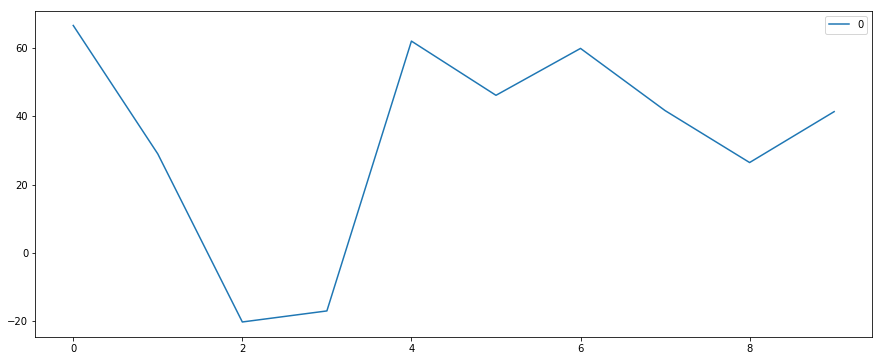

In [206]:
percentage_df.plot(figsize=(15, 6))
plt.show()

In [207]:
frames = [data,percentage_df]
result = pd.concat(frames, axis=1, sort=False)
result.columns = ["year", "quarter", "sales", "percentage"]
result

,year,quarter,sales,percentage
0,2018,1,194305,66.687076
1,2018,2,148048,28.998602
2,2018,3,73909,-20.332753
3,2018,4,125671,-17.090751
4,2019,1,177013,62.096141
5,2019,2,182923,46.191405
6,2019,3,259879,59.953842
7,2019,4,260185,41.709004
8,2020,1,85372,26.458776
9,2020,2,165142,41.396275


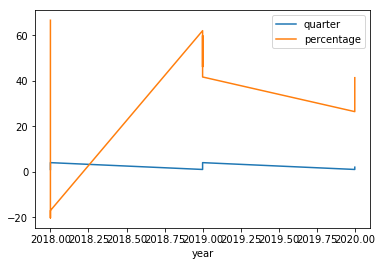

In [208]:
result.plot(x="year", y=["quarter","percentage"])

In [291]:
df2 = df.append(result)

In [292]:
df2

,year,quarter,sales,percentage
0,2014,1,74447.8,0.000000
1,2014,2,86538.8,0.000000
2,2014,3,143633.0,0.000000
3,2014,4,179628.0,0.000000
4,2015,1,68851.7,-8.127700
5,2015,2,89124.2,2.900930
6,2015,3,130260.0,-10.266900
7,2015,4,182297.0,1.464250
8,2016,1,93237.2,20.152200
9,2016,2,136082.0,36.407000


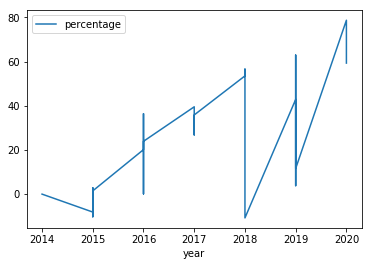

In [293]:
df2.plot(x="year",y=["percentage"],kind='line')

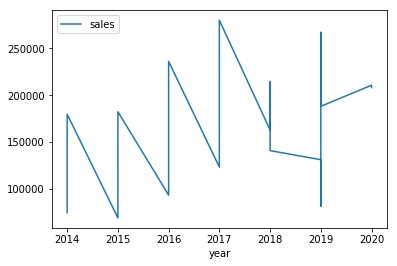

In [294]:
df2.plot(x="year",y=["sales"],kind='line')

In [295]:
df3=df2.groupby(['year','quarter'])
print(df3['percentage'].aggregate(np.sum))

year  quarter
2014  1           0.000000
      2           0.000000
      3           0.000000
      4           0.000000
2015  1          -8.127700
      2           2.900930
      3         -10.266900
      4           1.464250
2016  1          20.152200
      2          36.407000
      3           0.107200
      4          23.918400
2017  1          39.544500
      2          35.305100
      3          26.811800
      4          35.859600
2018  1          53.547182
      2          56.622571
      3          13.055031
      4         -10.776987
2019  1          42.890524
      2           3.820287
      3          62.962901
      4          11.618407
2020  1          78.749017
      2          59.336634
Name: percentage, dtype: float64


In [296]:
plot_result= df3['percentage'].aggregate(np.sum).unstack()
print(plot_result)

quarter          1          2          3          4
year                                               
2014      0.000000   0.000000   0.000000   0.000000
2015     -8.127700   2.900930 -10.266900   1.464250
2016     20.152200  36.407000   0.107200  23.918400
2017     39.544500  35.305100  26.811800  35.859600
2018     53.547182  56.622571  13.055031 -10.776987
2019     42.890524   3.820287  62.962901  11.618407
2020     78.749017  59.336634        NaN        NaN


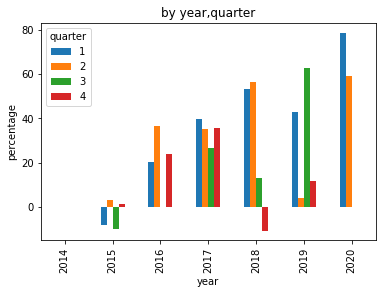

In [297]:
plot_result.plot(kind ='bar', title = 'by year,quarter')
plt.ylabel('percentage')
plt.show()

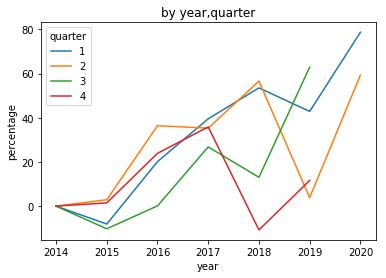

In [298]:
plot_result.plot(kind ='line', title = 'by year,quarter')
plt.ylabel('percentage')
plt.show()

In [217]:
df3=df2.groupby(['year','quarter'])
print(df3['sales'].aggregate(np.sum))

year  quarter
2014  1           74447.8
      2           86538.8
      3          143633.0
      4          179628.0
2015  1           68851.7
      2           89124.2
      3          130260.0
      4          182297.0
2016  1           93237.2
      2          136082.0
      3          143787.0
      4          236099.0
2017  1          123145.0
      2          133764.0
      3          196252.0
      4          280054.0
2018  1          194305.0
      2          148048.0
      3           73909.0
      4          125671.0
2019  1          177013.0
      2          182923.0
      3          259879.0
      4          260185.0
2020  1           85372.0
      2          165142.0
Name: sales, dtype: float64


In [218]:
plot_result1= df3['sales'].aggregate(np.sum).unstack()
print(plot_result1)

quarter         1         2         3         4
year                                           
2014      74447.8   86538.8  143633.0  179628.0
2015      68851.7   89124.2  130260.0  182297.0
2016      93237.2  136082.0  143787.0  236099.0
2017     123145.0  133764.0  196252.0  280054.0
2018     194305.0  148048.0   73909.0  125671.0
2019     177013.0  182923.0  259879.0  260185.0
2020      85372.0  165142.0       NaN       NaN


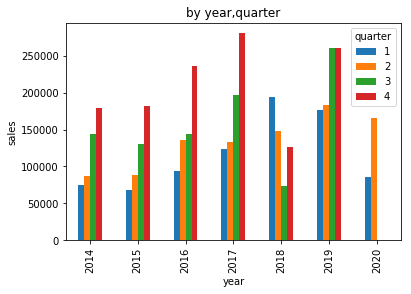

In [219]:
plot_result1.plot(kind ='bar', title = 'by year,quarter')
plt.ylabel('sales')
plt.show()

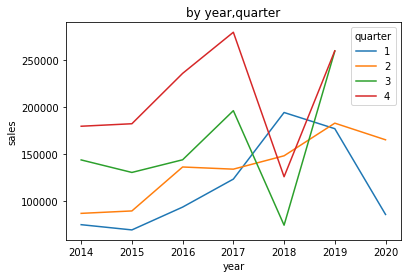

In [220]:
plot_result1.plot(kind ='line', title = 'by year,quarter')
plt.ylabel('sales')
plt.show()